<a href="https://colab.research.google.com/github/shahishivendra/Machine-learning-Projects/blob/master/apple_firmess_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:

import os
import pandas as pd

In [47]:
df=pd.read_csv('/content/drive/My Drive/dataset/D1+D2+D3+D4(firmness_starch_sugar).csv')
# df=df.drop(['Unnamed: 230'],1)
df.head()

,0.3258896,0.32651338,0.32390946,0.3239757,0.32771328,0.32988992,0.33677518,0.33867854,0.34072354,0.33916542,0.3394806,0.34314516,0.3509023,0.3569614,0.3632318,0.3681001,0.3738158,0.3774814,0.38088948,0.38096422,0.37791887,0.37763718,0.37505132,0.37232193,0.37098306,0.36799458,0.3644616,0.361258,0.35771012,0.35527664,0.35074925,0.34499004,0.34126276,0.33977705,0.3353204,0.3330249,0.33170187,0.328591,0.32619426,0.32521513,...,0.9091287,0.90429556,0.89870477,0.89556605,0.8898649,0.88517535,0.8843674,0.88025516,0.87350017,0.8642985,0.8642931,0.8575815,0.85655487,0.8562764,0.8518928,0.8513004,0.8468321,0.8432804,0.8428924,0.84022874,0.83181185,0.8248947,0.8189447,0.815032,0.79511124,0.78425515,0.7648212,0.74989074,0.7287993,0.7145718,0.716515,0.71462977,0.71727747,0.72986376,0.70112425,0.73898476,0.7707859,19.283,3,9
0,0.251012,0.246361,0.252845,0.251627,0.258086,0.261850,0.266073,0.271184,0.272857,0.276125,0.279158,0.281740,0.286329,0.292746,0.299174,0.304232,0.308236,0.310625,0.313434,0.313913,0.310905,0.310285,0.307001,0.304954,0.300554,0.298286,0.294212,0.292615,0.287706,0.284550,0.280043,0.276742,0.275035,0.271216,0.269505,0.267821,0.264377,0.262597,0.260753,0.259488,...,0.806908,0.795347,0.791267,0.783143,0.775656,0.770117,0.765706,0.758937,0.756772,0.749693,0.747368,0.743542,0.740043,0.737065,0.736094,0.732861,0.732326,0.728561,0.730869,0.724080,0.721133,0.719915,0.717884,0.708622,0.694314,0.688580,0.669679,0.649066,0.638744,0.615733,0.612499,0.603952,0.618346,0.607269,0.607156,0.588179,0.608183,19.283,3.0,9.0
1,0.278941,0.278165,0.279084,0.278245,0.281188,0.288029,0.291170,0.297048,0.299974,0.303187,0.305798,0.311987,0.318072,0.326240,0.335871,0.340756,0.347122,0.352470,0.353728,0.353925,0.353198,0.351689,0.348133,0.347622,0.341457,0.337266,0.332369,0.327075,0.323705,0.320397,0.313378,0.310217,0.306278,0.301521,0.299093,0.295422,0.294194,0.291644,0.289646,0.287082,...,0.923487,0.916306,0.910690,0.902432,0.894241,0.890683,0.882310,0.874097,0.860785,0.858187,0.852328,0.842147,0.835132,0.834074,0.823527,0.823058,0.816572,0.810128,0.807663,0.802413,0.800424,0.793762,0.785911,0.781610,0.774902,0.769093,0.749795,0.730243,0.716603,0.716782,0.723427,0.730067,0.747077,0.744057,0.745689,0.753812,0.751418,19.283,3.0,9.0
2,0.288306,0.286717,0.289982,0.292554,0.301302,0.303459,0.307858,0.312457,0.313273,0.320310,0.321397,0.328293,0.333027,0.341026,0.349211,0.356494,0.361539,0.364261,0.367079,0.367726,0.365703,0.367753,0.363068,0.359094,0.355247,0.352749,0.347114,0.341928,0.339083,0.334992,0.330245,0.326397,0.324117,0.319130,0.317942,0.314102,0.311679,0.309491,0.308755,0.306024,...,0.961582,0.946263,0.938257,0.934864,0.928262,0.914100,0.907311,0.899919,0.891759,0.891535,0.882458,0.878556,0.867546,0.860599,0.858238,0.853121,0.847454,0.845260,0.840526,0.840345,0.839758,0.827037,0.831677,0.818744,0.805455,0.801723,0.787176,0.775142,0.760149,0.757985,0.740644,0.747323,0.748516,0.755774,0.784618,0.753876,0.724753,19.283,3.0,9.0
3,0.280040,0.281690,0.280576,0.279660,0.279732,0.285649,0.289809,0.292972,0.293711,0.293864,0.296265,0.301085,0.307464,0.312078,0.320429,0.327396,0.330249,0.334932,0.334669,0.335567,0.333928,0.332652,0.331291,0.328012,0.324764,0.321665,0.318219,0.314531,0.309996,0.306726,0.300814,0.297621,0.294645,0.290473,0.287284,0.284965,0.281969,0.279496,0.277687,0.275735,...,0.868322,0.859573,0.858146,0.851583,0.846359,0.840643,0.832239,0.828700,0.823221,0.818712,0.813720,0.807516,0.804313,0.797870,0.792566,0.787554,0.787626,0.779941,0.775576,0.772675,0.768171,0.759893,0.751843,0.751719,0.733373,0.718621,0.704911,0.686656,0.674328,0.658566,0.664543,0.657114,0.648876,0.654579,0.695575,0.710188,0.706898,19.283,3.0,9.0
4,0.267406,0.267835,0.268148,0.269596,0.276513,0.279312,0.281611,0.286142,0.288486,0.288536,0.294675,0.294734,0.302653,0.310145,0.317444,0.321942,0.326658,0.329237,0.331899,0.332512,0.332706,0.330340,0.327301,0.325700,0.321909,0.318083,0.314801,0.311241,0.306323,0.303614,0.297696,0.294635,0.290030,0.287808,0.284403,0.

In [48]:
columns=[]
for i in range(228):
    string='X'+str(i)
    columns.append(string)
columns.append('firmnes')
columns.append('starch')
columns.append('sugar')
df.set_axis(columns,axis=1,inplace=True)

df.head()
df.sample(frac=1)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,firmnes,starch,sugar
928,0.291752,0.294539,0.296611,0.296835,0.302034,0.309285,0.311918,0.315263,0.317755,0.317118,0.322697,0.322996,0.328979,0.332576,0.338816,0.343958,0.348066,0.353820,0.354665,0.355613,0.354942,0.353416,0.351009,0.348204,0.346261,0.343839,0.338981,0.336455,0.331584,0.328203,0.323629,0.319922,0.316543,0.313428,0.309450,0.306622,0.304238,0.302874,0.300541,0.297582,...,0.850724,0.844109,0.838373,0.837161,0.830130,0.827778,0.822231,0.820661,0.818169,0.809590,0.808582,0.805622,0.800600,0.794180,0.793886,0.788968,0.783109,0.779567,0.773675,0.770214,0.763489,0.760028,0.757215,0.743876,0.723620,0.702586,0.679133,0.644998,0.617589,0.588797,0.570185,0.553155,0.555429,0.567628,0.564624,0.562585,0.604465,17.941,2.5,10.8
235,0.254775,0.258974,0.262388,0.259759,0.267942,0.273672,0.280563,0.282305,0.284724,0.285987,0.285856,0.287918,0.291157,0.296662,0.302430,0.308660,0.311179,0.314492,0.315291,0.316985,0.314619,0.312893,0.311277,0.308287,0.305013,0.303494,0.299456,0.295776,0.293027,0.289403,0.284574,0.281671,0.278161,0.275472,0.272348,0.270042,0.267040,0.265377,0.263696,0.262329,...,0.731338,0.726355,0.721283,0.717561,0.712127,0.705066,0.704301,0.698614,0.698764,0.692756,0.687843,0.686500,0.682954,0.680316,0.677358,0.673592,0.671509,0.670166,0.664719,0.657855,0.658980,0.651067,0.642178,0.636256,0.613679,0.591923,0.567721,0.530865,0.488705,0.459622,0.432058,0.411804,0.407046,0.416001,0.416794,0.430635,0.429923,16.896,2.0,9.1
1725,0.324266,0.321161,0.325686,0.327555,0.332732,0.344326,0.347572,0.358756,0.357393,0.361899,0.364952,0.369920,0.375699,0.383100,0.391885,0.397081,0.401363,0.404205,0.405131,0.405434,0.404518,0.403296,0.398747,0.394587,0.391599,0.386693,0.382211,0.377286,0.372844,0.370695,0.363688,0.359299,0.355971,0.352018,0.351296,0.349562,0.347047,0.344060,0.341569,0.340624,...,0.894922,0.885809,0.882647,0.871004,0.859185,0.858058,0.854948,0.847440,0.844117,0.835940,0.834899,0.830445,0.820861,0.822204,0.815990,0.813857,0.816358,0.809511,0.805428,0.813502,0.810438,0.806374,0.797094,0.786816,0.770605,0.751308,0.735613,0.703754,0.674722,0.649166,0.640928,0.627415,0.625830,0.618358,0.597811,0.609835,0.599539,17.204,2.5,NaN
1264,0.266711,0.262472,0.266092,0.272635,0.273264,0.278224,0.281604,0.284269,0.287217,0.290813,0.292215,0.296145,0.301693,0.311075,0.317767,0.324433,0.328432,0.332274,0.331520,0.333816,0.332364,0.331924,0.329139,0.326702,0.322716,0.321670,0.316900,0.313182,0.310395,0.305943,0.302345,0.298172,0.294165,0.292160,0.287446,0.286536,0.282872,0.280241,0.279161,0.277196,...,0.860272,0.856365,0.845546,0.840870,0.838226,0.831822,0.825805,0.819334,0.814185,0.807247,0.804844,0.800558,0.791257,0.790317,0.787132,0.780957,0.779376,0.772636,0.773685,0.765499,0.758777,0.760194,0.750662,0.747791,0.733443,0.711505,0.699705,0.675465,0.655558,0.628914,0.622697,0.621063,0.618543,0.620643,0.613805,0.645535,0.646077,19.019,2.5,8.1
1621,0.332433,0.342537,0.337373,0.344198,0.350416,0.355880,0.359044,0.369672,0.369548,0.371971,0.371937,0.376071,0.380803,0.386116,0.390587,0.399004,0.403193,0.403906,0.405831,0.406159,0.404325,0.403262,0.400074,0.396655,0.393035,0.391962,0.386301,0.383683,0.379681,0.377076,0.371463,0.368402,0.365727,0.363051,0.358986,0.357372,0.354593,0.353094,0.351926,0.348738,...,0.880941,0.872989,0.870135,0.865030,0.857140,0.856757,0.847133,0.844868,0.837344,0.832630,0.824270,0.826883,0.823276,0.816568,0.812899,0.811222,0.806674,0.795527,0.794526,0.796144,0.788202,0.784125,0.780266,0.767481,0.750127,0.722597,0.693342,0.663508,0.623358,0.596109,0.575054,0.546603,0.536541,0.532251,0.536939,0.557227,0.557182,19.470,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [49]:
df=df.drop(['sugar','starch'],1)

In [50]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,firmnes
0,0.251012,0.246361,0.252845,0.251627,0.258086,0.261850,0.266073,0.271184,0.272857,0.276125,0.279158,0.281740,0.286329,0.292746,0.299174,0.304232,0.308236,0.310625,0.313434,0.313913,0.310905,0.310285,0.307001,0.304954,0.300554,0.298286,0.294212,0.292615,0.287706,0.284550,0.280043,0.276742,0.275035,0.271216,0.269505,0.267821,0.264377,0.262597,0.260753,0.259488,...,0.821043,0.813322,0.806908,0.795347,0.791267,0.783143,0.775656,0.770117,0.765706,0.758937,0.756772,0.749693,0.747368,0.743542,0.740043,0.737065,0.736094,0.732861,0.732326,0.728561,0.730869,0.724080,0.721133,0.719915,0.717884,0.708622,0.694314,0.688580,0.669679,0.649066,0.638744,0.615733,0.612499,0.603952,0.618346,0.607269,0.607156,0.588179,0.608183,19.283
1,0.278941,0.278165,0.279084,0.278245,0.281188,0.288029,0.291170,0.297048,0.299974,0.303187,0.305798,0.311987,0.318072,0.326240,0.335871,0.340756,0.347122,0.352470,0.353728,0.353925,0.353198,0.351689,0.348133,0.347622,0.341457,0.337266,0.332369,0.327075,0.323705,0.320397,0.313378,0.310217,0.306278,0.301521,0.299093,0.295422,0.294194,0.291644,0.289646,0.287082,...,0.929047,0.923115,0.923487,0.916306,0.910690,0.902432,0.894241,0.890683,0.882310,0.874097,0.860785,0.858187,0.852328,0.842147,0.835132,0.834074,0.823527,0.823058,0.816572,0.810128,0.807663,0.802413,0.800424,0.793762,0.785911,0.781610,0.774902,0.769093,0.749795,0.730243,0.716603,0.716782,0.723427,0.730067,0.747077,0.744057,0.745689,0.753812,0.751418,19.283
2,0.288306,0.286717,0.289982,0.292554,0.301302,0.303459,0.307858,0.312457,0.313273,0.320310,0.321397,0.328293,0.333027,0.341026,0.349211,0.356494,0.361539,0.364261,0.367079,0.367726,0.365703,0.367753,0.363068,0.359094,0.355247,0.352749,0.347114,0.341928,0.339083,0.334992,0.330245,0.326397,0.324117,0.319130,0.317942,0.314102,0.311679,0.309491,0.308755,0.306024,...,0.972914,0.962931,0.961582,0.946263,0.938257,0.934864,0.928262,0.914100,0.907311,0.899919,0.891759,0.891535,0.882458,0.878556,0.867546,0.860599,0.858238,0.853121,0.847454,0.845260,0.840526,0.840345,0.839758,0.827037,0.831677,0.818744,0.805455,0.801723,0.787176,0.775142,0.760149,0.757985,0.740644,0.747323,0.748516,0.755774,0.784618,0.753876,0.724753,19.283
3,0.280040,0.281690,0.280576,0.279660,0.279732,0.285649,0.289809,0.292972,0.293711,0.293864,0.296265,0.301085,0.307464,0.312078,0.320429,0.327396,0.330249,0.334932,0.334669,0.335567,0.333928,0.332652,0.331291,0.328012,0.324764,0.321665,0.318219,0.314531,0.309996,0.306726,0.300814,0.297621,0.294645,0.290473,0.287284,0.284965,0.281969,0.279496,0.277687,0.275735,...,0.885536,0.875705,0.868322,0.859573,0.858146,0.851583,0.846359,0.840643,0.832239,0.828700,0.823221,0.818712,0.813720,0.807516,0.804313,0.797870,0.792566,0.787554,0.787626,0.779941,0.775576,0.772675,0.768171,0.759893,0.751843,0.751719,0.733373,0.718621,0.704911,0.686656,0.674328,0.658566,0.664543,0.657114,0.648876,0.654579,0.695575,0.710188,0.706898,19.283
4,0.267406,0.267835,0.268148,0.269596,0.276513,0.279312,0.281611,0.286142,0.288486,0.288536,0.294675,0.294734,0.302653,0.310145,0.317444,0.321942,0.326658,0.329237,0.331899,0.332512,0.332706,0.330340,0.327301,0.325700,0.321909,0.318083,0.314801,0.311241,0.306323,0.303614,0.297696,0.294635,0.290030,0.287808,0.284403,0.282099,0.278704,0.277125,0.275587,0.272566,...,0.880692,0.874402,0.867661,0.862202,0.853043,0.846202,0.843367,0.835006,0.826835,0.820511,0.817622,0.812771,0.802825,0.800195,0.797962,0.796269,0.791514,0.790994,0.786827,0.781104,0.776505,0.777236,0.768600,0.766545,0.763331,0.752560,0.735428,0.723456,0.705070,0.685569,0.674722,0.654173,0.657972,0.646563,0.646621,0.656450,0.669146,0.644838,0.662986,17.710
...,...,...,...,...,..

In [51]:

df.idxmax()

X0         1670
X1         1670
X2         1670
X3         1670
X4         1670
           ... 
X224       1670
X225       1670
X226        255
X227       1670
firmnes    2014
Length: 229, dtype: int64

In [ ]:
df=df.dropna()
df=df.sort_values(by=['firmnes'], ascending=False)

In [52]:
odd=0
for i in df.index:
    if df.at[i,'firmnes']>1000:
        df.at[i, 'firmnes'] /=1000
    if df.at[i,'firmnes']==2.383:
        df.at[i, 'firmnes'] =20.383
df=df.sort_values(by=['firmnes'])

df.head(11)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,firmnes
1564,0.382390,0.382104,0.388999,0.382231,0.391319,0.394728,0.397646,0.406926,0.403667,0.404160,0.402958,0.409004,0.410604,0.414553,0.418000,0.423077,0.426010,0.428482,0.428377,0.428791,0.428065,0.426785,0.423008,0.422427,0.420395,0.416282,0.411752,0.412111,0.408950,0.404771,0.400839,0.396498,0.395266,0.393188,0.390123,0.388195,0.386288,0.382822,0.382972,0.382184,...,0.817910,0.811130,0.807167,0.799970,0.796351,0.791431,0.786618,0.783192,0.778321,0.777364,0.769730,0.764553,0.761679,0.755922,0.754077,0.753421,0.748882,0.745443,0.742681,0.740939,0.735441,0.733986,0.731585,0.722463,0.718939,0.704963,0.694067,0.665396,0.638070,0.612840,0.581864,0.553695,0.532125,0.514551,0.516146,0.509118,0.510914,0.523457,0.524450,10.516
1566,0.317220,0.313152,0.318301,0.316554,0.328889,0.331509,0.333166,0.341711,0.339898,0.339755,0.340462,0.341828,0.348724,0.351211,0.353681,0.359326,0.361792,0.367039,0.366650,0.365316,0.364911,0.362917,0.362289,0.358342,0.357130,0.354628,0.349951,0.348466,0.345431,0.344041,0.337657,0.335466,0.333022,0.330416,0.328017,0.326509,0.323975,0.324221,0.320941,0.319926,...,0.782223,0.781333,0.774172,0.766902,0.763796,0.759837,0.751447,0.750847,0.745379,0.740632,0.735995,0.733591,0.731202,0.725504,0.721460,0.716837,0.717357,0.712279,0.709418,0.708526,0.705076,0.699568,0.700177,0.690505,0.684531,0.677072,0.654407,0.637732,0.608820,0.576511,0.545990,0.520623,0.494434,0.479117,0.470499,0.478356,0.479043,0.493597,0.497994,10.516
1565,0.338925,0.341682,0.343822,0.345935,0.351445,0.353671,0.359134,0.365238,0.362821,0.361085,0.361417,0.361038,0.364830,0.369557,0.371266,0.373722,0.377092,0.379193,0.380215,0.380761,0.382566,0.381695,0.381852,0.378258,0.377640,0.377029,0.375135,0.372370,0.371132,0.368697,0.366052,0.364365,0.364193,0.361140,0.360431,0.359013,0.358277,0.357394,0.356803,0.356387,...,0.800046,0.799916,0.787878,0.782491,0.774911,0.768796,0.767634,0.760771,0.756250,0.752742,0.751623,0.742595,0.742637,0.736439,0.731715,0.727214,0.725984,0.723236,0.719812,0.714400,0.713683,0.706051,0.704344,0.698961,0.696926,0.685065,0.666498,0.642424,0.617113,0.590929,0.557634,0.529114,0.503447,0.494659,0.486590,0.483217,0.499560,0.496097,0.500449,10.516
1563,0.376827,0.376026,0.372040,0.376515,0.385382,0.387028,0.393734,0.394931,0.397047,0.396102,0.395550,0.401420,0.401434,0.404659,0.411734,0.415644,0.417898,0.419697,0.420483,0.421450,0.419010,0.419206,0.415776,0.412855,0.411981,0.408307,0.405526,0.402091,0.399869,0.396387,0.393220,0.389298,0.386190,0.386517,0.383270,0.379908,0.380742,0.377675,0.377530,0.375067,...,0.816000,0.809951,0.805532,0.799090,0.795442,0.790859,0.785384,0.782966,0.778941,0.771258,0.770817,0.765590,0.762957,0.761372,0.753429,0.751096,0.752174,0.747851,0.741164,0.740510,0.735967,0.734095,0.731107,0.724164,0.714390,0.710596,0.686694,0.671635,0.645345,0.613122,0.580937,0.556220,0.530775,0.514813,0.510562,0.515093,0.516142,0.541188,0.535697,10.516
1562,0.314865,0.311749,0.317708,0.316276,0.327610,0.330502,0.332100,0.336659,0.336329,0.336072,0.334994,0.337624,0.338424,0.341712,0.344563,0.349301,0.351377,0.352382,0.351943,0.353780,0.350238,0.348554,0.346902,0.344792,0.343133,0.341368,0.337844,0.335517,0.331886,0.330264,0.326515,0.324119,0.321483,0.320796,0.318577,0.316978,0.314816,0.314311,0.312369,0.311722,...,0.669098,0.664137,0.659573,0.656110,0.654652,0.646359,0.645679,0.643190,0.638275,0.633959,0.630938,0.627501,0.624501,0.620749,0.619207,0.615673,0.613029,0.610042,0.608398,0.603473,0.603318,0.599344,0.595137,0.592426,0.586213,0.574154,0.558529,0.536559,0.509732,0.480214,0.451096,0.413839,0.400556,0.392020,0.388131,0.383422,0.386329,0.394271,0.405934,10.516
1561,0.

In [54]:
df=df.drop(df.index[[0,1,2,3,4,5,6,7,8,9]]) 

In [55]:
df=df.sort_values(by=['X99'],ascending=False)
df=df.drop([df.index[0], df.index[1]])
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,firmnes
1525,0.663798,0.665016,0.667516,0.666645,0.676229,0.679727,0.684224,0.694786,0.695843,0.692948,0.703013,0.706099,0.707617,0.728054,0.731014,0.737371,0.745647,0.750326,0.754297,0.753000,0.755278,0.752571,0.753072,0.750948,0.752495,0.744008,0.743241,0.741409,0.738860,0.732773,0.727938,0.725733,0.723108,0.719728,0.716062,0.711708,0.708297,0.706369,0.704568,0.702216,...,1.214960,1.221583,1.216321,1.210340,1.195399,1.194615,1.199804,1.191638,1.189352,1.189877,1.178473,1.189048,1.180791,1.187452,1.166089,1.177437,1.173608,1.177496,1.171108,1.167985,1.158338,1.151920,1.146217,1.148896,1.143547,1.135353,1.127290,1.088220,1.078861,1.042161,1.018085,0.981022,0.967703,0.977208,0.948341,0.952282,0.942212,0.953950,0.938808,16.324
1523,0.653588,0.661264,0.659057,0.659459,0.673043,0.673384,0.674137,0.685897,0.691216,0.692841,0.696240,0.701664,0.715098,0.714393,0.722400,0.733786,0.738724,0.741248,0.746675,0.745192,0.744256,0.745358,0.743614,0.741652,0.738994,0.738525,0.733206,0.729907,0.727558,0.722216,0.717718,0.713684,0.710480,0.709126,0.705598,0.698563,0.695393,0.696639,0.695113,0.693744,...,1.201935,1.185286,1.186106,1.182376,1.175418,1.166060,1.168197,1.165677,1.157142,1.152009,1.152709,1.154573,1.153501,1.138971,1.151877,1.138822,1.138732,1.131526,1.127480,1.134391,1.123827,1.130739,1.122860,1.127316,1.114893,1.104532,1.085998,1.065523,1.040858,1.025407,0.974833,0.959559,0.925375,0.915786,0.927518,0.908267,0.929743,0.951323,0.960984,16.324
1530,0.580927,0.583918,0.597574,0.598431,0.598466,0.608694,0.613816,0.620638,0.619711,0.620489,0.628035,0.630087,0.636464,0.646465,0.654739,0.660411,0.668157,0.671346,0.675733,0.676948,0.678847,0.672781,0.670838,0.671168,0.667167,0.665311,0.660905,0.657752,0.654919,0.650847,0.647556,0.643548,0.639264,0.636733,0.635528,0.630615,0.629336,0.626627,0.621032,0.622167,...,1.185344,1.175183,1.176790,1.177437,1.172584,1.173059,1.167623,1.159618,1.154344,1.152722,1.150946,1.143220,1.137671,1.130457,1.129765,1.134769,1.119706,1.112457,1.109118,1.105722,1.112496,1.103657,1.107937,1.105603,1.091773,1.082375,1.073182,1.048066,1.019496,1.003247,0.975325,0.952536,0.917135,0.901790,0.927232,0.925543,0.892756,0.921642,0.935890,17.006
1550,0.628623,0.618146,0.635522,0.639152,0.642069,0.645137,0.644552,0.656307,0.657857,0.659990,0.660512,0.661995,0.660076,0.669841,0.670474,0.676840,0.679797,0.682957,0.684241,0.682266,0.679686,0.678606,0.679562,0.675584,0.676352,0.673309,0.671101,0.670842,0.665694,0.664150,0.661802,0.658235,0.653604,0.655877,0.654911,0.653280,0.649598,0.652958,0.647057,0.647660,...,1.091894,1.078626,1.079323,1.072201,1.069783,1.062984,1.059451,1.062586,1.050994,1.047552,1.044737,1.039451,1.036054,1.037417,1.031856,1.033785,1.031182,1.020861,1.026736,1.022608,1.014416,1.017009,1.009858,1.005519,1.003550,0.990793,0.979140,0.946433,0.915826,0.886624,0.860134,0.829840,0.811463,0.797107,0.798036,0.794086,0.783604,0.829062,0.805561,14.597
1524,0.562828,0.573812,0.570930,0.569036,0.580963,0.582098,0.587305,0.594166,0.595091,0.598616,0.599858,0.606864,0.613504,0.620974,0.629267,0.636751,0.638716,0.645690,0.649740,0.649563,0.649404,0.649173,0.645780,0.646347,0.643864,0.640169,0.636770,0.633401,0.631293,0.625824,0.623641,0.620132,0.615314,0.611286,0.610057,0.607511,0.604744,0.601258,0.598744,0.600327,...,1.106826,1.102431,1.100535,1.093006,1.085621,1.081042,1.076990,1.075345,1.073227,1.062221,1.063584,1.056900,1.051823,1.058939,1.057434,1.044986,1.048647,1.042455,1.036670,1.033254,1.028178,1.027466,1.029631,1.021799,1.024597,1.009257,0.994595,0.970414,0.947152,0.916376,0.901122,0.861718,0.854185,0.846281,0.835342,0.838240,0.833338,0.856351,0.852129,16.324
...,...

In [56]:
Y=df['firmnes']
X=df.drop(['firmnes'],1)
print(len(Y),len(X))

2370 2370


In [57]:
X.shape

(2370, 228)

In [64]:
y=[]
c0=0
c1=1
for ele in Y:
  if ele>=16:
    y.append(1)
    c1+=1
  else:
    y.append(0)
    c0+=1
len(y)

2370

<function matplotlib.pyplot.show>

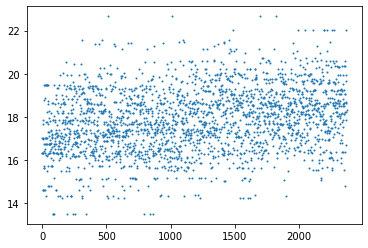

In [65]:
import numpy as np
import matplotlib.pyplot as plt


y1 = np.asarray(Y)

plt.plot(y1,'o',markersize=1)
plt.show

<function matplotlib.pyplot.show>

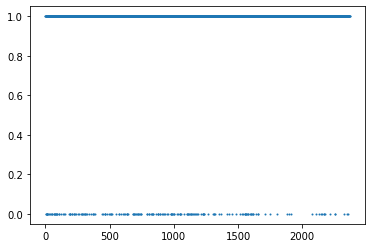

In [66]:
import numpy as np
import matplotlib.pyplot as plt


y1 = np.asarray(y)

plt.plot(y1,'o',markersize=1)
plt.show

In [67]:
print(c0,c1)

196 2175


## OVERSAMPLING 

In [68]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)
# RandomOverSampler
 

# sampler = RandomOverSampler(ratio={1: 1029, 0: 197},random_state=0)
# X_rs, y_rs = sampler.fit_sample(X2, Y)
# print('RandomOverSampler {}')

# SMOTE
sampler = SMOTE()
X_rs, y_rs = sampler.fit_sample(X, y)
print('SMOTE {}')

# # ADASYN
# sampler = ADASYN(ratio={1: 1029, 0: 197},random_state=0)
# X_rs, y_rs = sampler.fit_sample(X2, Y)



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


SMOTE {}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [69]:
print(len(X_rs),len(y_rs))

4348 4348


<function matplotlib.pyplot.show>

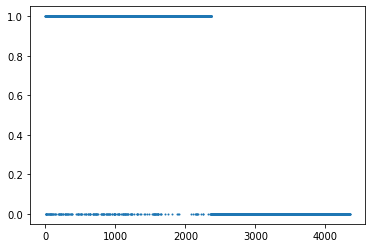

In [70]:
import numpy as np
import matplotlib.pyplot as plt


y1 = np.asarray(y_rs)

plt.plot(y1,'o',markersize=1)
plt.show

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_rs,y_rs)

In [72]:
from sklearn.preprocessing import StandardScaler as ss
scaler=ss()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50,svd_solver='auto')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [74]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.model_selection import GridSearchCV
import numpy as np
nbclf=gbc()
parameters = {
    #"loss":["deviance"],
     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
     "n_estimators":[10,15,20,30,50,75,100]
    }
clf = GridSearchCV(nbclf, parameters,scoring='accuracy',refit=False,cv=2, n_jobs=-1)
clf.fit(X_train_pca,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [75]:
clf.best_params_

{'learning_rate': 0.2, 'max_features': 'sqrt', 'n_estimators': 100}

In [76]:
nbclf=gbc(learning_rate= 0.1, max_features= 'log2', n_estimators= 100).fit(X_train_pca,y_train)

In [77]:
from sklearn.metrics import accuracy_score
y_score=nbclf.predict(X_test_pca)
accuracy_score(y_test,y_score)

0.8776448942042319

In [78]:
from sklearn.neural_network import MLPClassifier
MLPCLF=MLPClassifier()
parameters={
    'alpha': [.01,.001,1,10,0.1],
    'activation': ["logistic", "relu",'tanh','identity'],
    'learning_rate' :['constant', 'invscaling', 'adaptive'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
    
    
    
    
    
}
mlp_grid=GridSearchCV(MLPCLF,param_grid=parameters,n_jobs=-1,verbose=2,scoring='accuracy',cv=5)

In [79]:
mlp_grid.fit(X_train_pca,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation'

In [80]:
mlp_grid.best_params_

{'activation': 'relu', 'alpha': 0.001, 'learning_rate': 'adaptive'}

In [81]:
y_score=mlp_grid.predict(X_test_pca)
accuracy_score(y_test,y_score)

0.9429622815087396

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda_clf=LDA().fit(X_train_pca,y_train)

y_score=lda_clf.predict(X_test_pca)
accuracy_score(y_score,y_test)

0.7221711131554738